In [1]:
# Import Libaries
library(tidyverse)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)

library(tidyverse)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# Load and mutate data
# tennis_data <- read_csv('atp2017-2019.csv')
tennis_data_2019<-read.csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv')
tennis_data_2018<-read.csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv')
tennis_data_2017<-read.csv('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv')
tennis_data <- bind_rows(tennis_data_2019, tennis_data_2018, tennis_data_2017)
winner_data <- select(tennis_data, c(winner_name, 
                      winner_age, 
                      winner_ht, 
                      w_ace, 
                      w_df, 
                      w_svpt, 
                      w_1stIn, 
                      w_1stWon, 
                      w_SvGms, 
                      w_bpSaved, 
                      w_bpFaced)) %>%
                rename(name=winner_name,
                      age=winner_age,
                      height=winner_ht,
                      aces=w_ace,
                      double_faults=w_df,
                      serve_points=w_svpt,
                      first_serves_made=w_1stIn,
                      first_serve_points=w_1stWon,
                      serve_games=w_SvGms,
                      break_points_saved=w_bpSaved,
                      break_points_faced=w_bpFaced) %>%
                add_column(match_result='win')
loser_data <- select(tennis_data, c(loser_name, 
                      loser_age, 
                      loser_ht, 
                      l_ace, 
                      l_df, 
                      l_svpt, 
                      l_1stIn, 
                      l_1stWon, 
                      l_SvGms, 
                      l_bpSaved, 
                      l_bpFaced)) %>%
                rename(name=loser_name,
                      age=loser_age,
                      height=loser_ht,
                      aces=l_ace,
                      double_faults=l_df,
                      serve_points=l_svpt,
                      first_serves_made=l_1stIn,
                      first_serve_points=l_1stWon,
                      serve_games=l_SvGms,
                      break_points_saved=l_bpSaved,
                      break_points_faced=l_bpFaced) %>%
                add_column(match_result='lose')
tennis_data_mod <- bind_rows(winner_data, loser_data)

In [3]:
# Split Data in Train and Test Set

tennis_split <- initial_split(tennis_data_mod, prop=0.75, strata=match_result)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

# Exploratory Data Analysis

In [6]:
# mean for each predictor
predictors_mean<- map_dfr(tennis_train[,2:10], mean, na.rm=TRUE)
predictors_mean

# distribution of match results in training set
match_result_dist <- tibble(num_of_wins=nrow(filter(tennis_train, match_result=='win')), num_of_loses=nrow(filter(tennis_train, match_result=='lose')))
match_result_dist

# count of NA's in each predictor column
count_of_nas <- map_dfr(tennis_train[,2:10], ~sum(is.na(.)))
count_of_nas

# summarize_all(tennis_train[,2:11], max, na.rm=TRUE)

age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27.66748,187.2344,6.529212,3.126808,81.33671,49.86434,35.8256,12.74148,4.128627


num_of_wins,num_of_loses
<int>,<int>
6441,6441


age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,1129,233,233,233,233,233,233,233


In [33]:
# Caluclate summary stats for each predictor column

means_df <- summarize_all(tennis_train[,2:11], mean, na.rm=TRUE)
max_df <- summarize_all(tennis_train[,2:11], max, na.rm=TRUE)
min_df <- summarize_all(tennis_train[,2:11], min, na.rm=TRUE)
median_df <- summarize_all(tennis_train[,2:11], median, na.rm=TRUE)
sd_df <- summarize_all(tennis_train[,2:11], sd, na.rm=TRUE)

means_df
max_df
min_df
median_df
sd_df

age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved,break_points_faced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27.68747,187.2592,6.556891,3.096624,81.40199,49.99723,35.9233,12.75433,4.114968,6.735906


age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved,break_points_faced
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
46.03696,211,67,26,291,218,171,50,24,30


age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved,break_points_faced
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
14.51335,1.83,0,0,0,0,0,0,0,0


age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved,break_points_faced
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
27.94251,188,5,3,77,47,34,12,4,6


age,height,aces,double_faults,serve_points,first_serves_made,first_serve_points,serve_games,break_points_saved,break_points_faced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.716834,7.940073,5.741925,2.438423,29.61999,19.35082,14.40497,4.292833,3.280098,4.493955


In [40]:
# Do younger players win more than older players? From the mean, we say that players who are 27 or younger are young players,
# and players with age 27 and greater are old players

threshold <- pull(means_df, age)

young <- filter(tennis_train, age <= threshold, match_result == 'win')
old <- filter(tennis_train, age > threshold, match_result == 'win')

young_win_prob <- nrow(young)/nrow(filter(tennis_train, age <= threshold))
old_win_prob <- nrow(old)/nrow(filter(tennis_train, age > threshold))

young_win_prob
old_win_prob

[1] 0.4848146

[1] 0.5143418

In [41]:
# Do taller players have a higher winrate than shorter players? We set the threshold to me the mean height of players

threshold <- pull(means_df, height)

tall <- filter(tennis_train, height <= threshold, match_result == 'win')
short <- filter(tennis_train, height > threshold, match_result == 'win')

tall_win_prob <- nrow(tall)/nrow(filter(tennis_train, height <= threshold))
short_win_prob <- nrow(short)/nrow(filter(tennis_train, height > threshold))

tall_win_prob
short_win_prob

[1] 0.5067922

[1] 0.5249036

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1112 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 350 rows containing non-finite values (stat_boxplot).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 3 rows containing non-

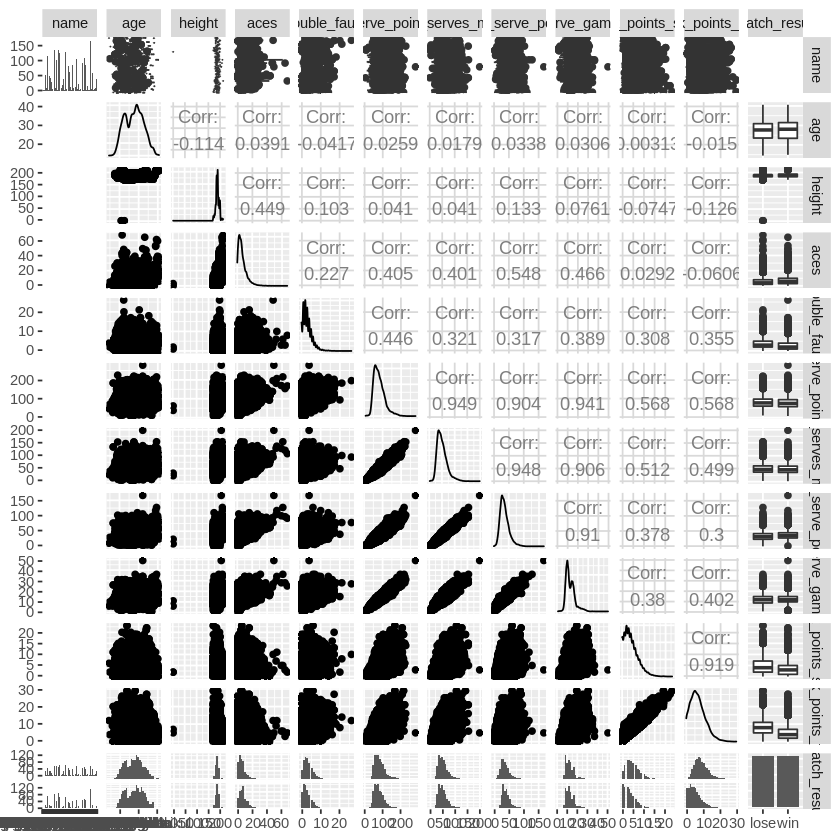

In [10]:
tennis_eda <- ggpairs(tennis_train, cardinality_threshold=500)
tennis_eda